In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load datasets
customers = pd.read_csv("/Users/apple/Desktop/Internship/Customers.csv")
products = pd.read_csv("/Users/apple/Desktop/Internship/Products.csv")
transactions = pd.read_csv("/Users/apple/Desktop/Internship/Transactions.csv")


In [3]:
# Inspect datasets
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [6]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
# Checking missing values
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [8]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Counting customers by region
region_count = customers['Region'].value_counts()
region_count.plot(kind='bar', title='Customers by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


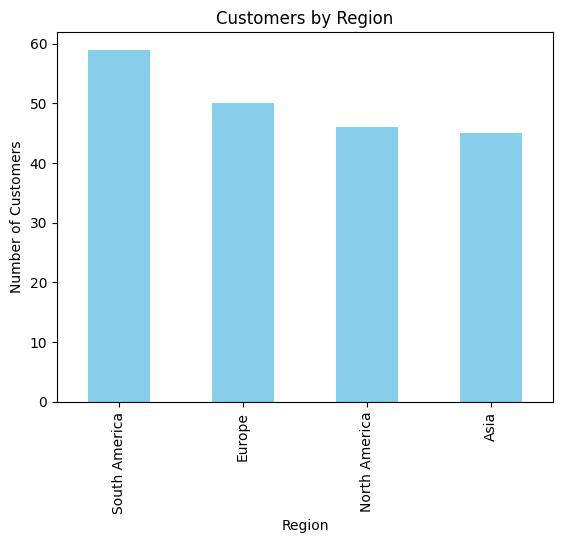

In [9]:
region_count = customers['Region'].value_counts()
region_count.plot(kind='bar', title='Customers by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


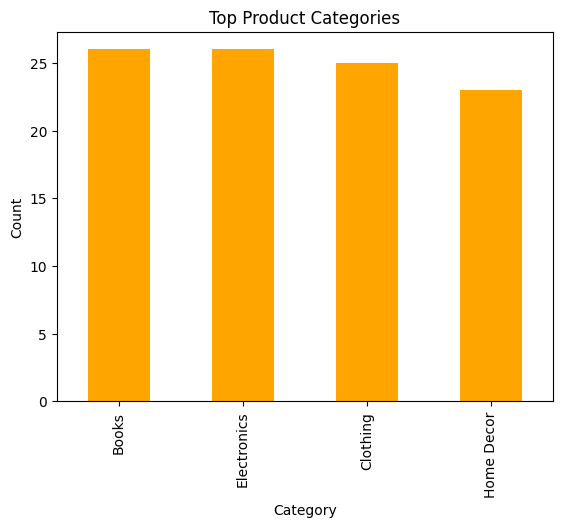

Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


In [10]:
# Top categories by count
top_categories = products['Category'].value_counts()
top_categories.plot(kind='bar', title='Top Product Categories', color='orange')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Average price per category
avg_price_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(avg_price_category)


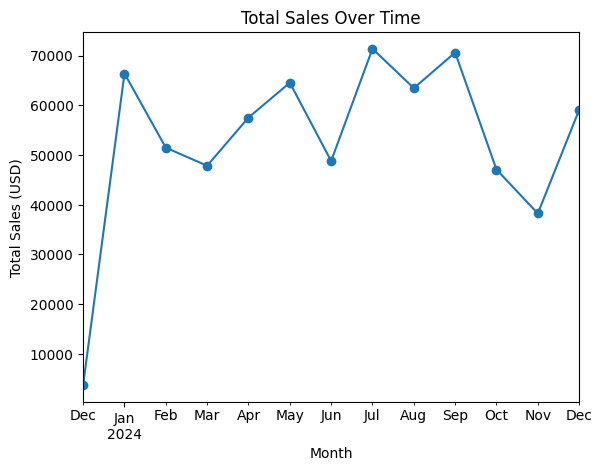

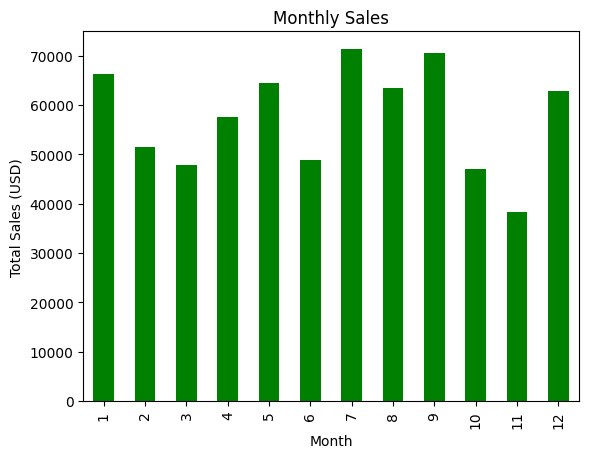

In [11]:
# Converting TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Total sales over time
sales_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_over_time.plot(kind='line', title='Total Sales Over Time', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

# Peak months for transactions
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()


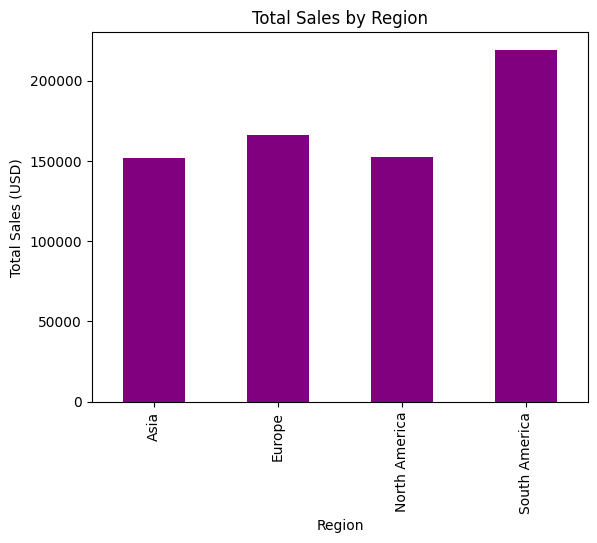

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


In [12]:
# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Analyze total spending per region
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Total Sales by Region', color='purple')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

# Top customers by spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)
